In [23]:
# Solution goes here
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import pandas as pd
import random
import thinkstats2
import thinkplot
import scipy
from normal import Normal
import statsmodels.formula.api as smf


In [65]:
fifa_data = pd.read_csv('FIFA 2018 Statistics.csv')
variables = ('Goal Scored', 'Ball Possession %','Attempts', 'Blocked', 'Corners')

In [3]:
fifa_data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


## Variables
The 5 varaibles that I will be focusing on is "Goal Scored", "Ball Possession %", "Attempts", "Blocked", "Corners"
<ul>
    <li>"Goal Scored" is a discrete numerical variable of the amount of goals the team scored</li>
    <li>"Ball Possession" is a discrete numerical variable of the overall amount of time the team had the ball</li>
    <li>"Attempts" is a discrete numerical variable of the amount of goals the team attempted scored</li>
    <li>"Corners" is a discrete numerical variable of the number of corner shots used</li>
    <li>"Blocked" is a discrete numerical variable of number of opponent team's attempts blocked by the team</li></ul>

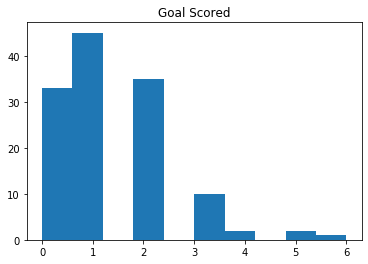

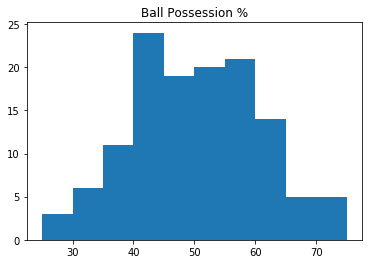

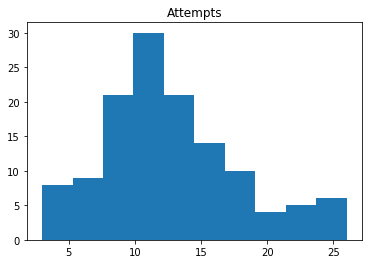

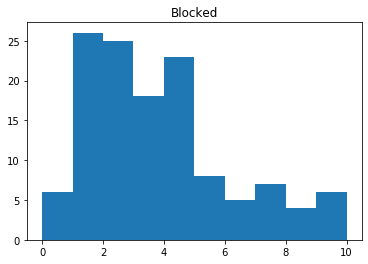

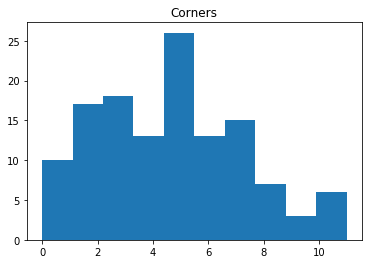

In [4]:
for v in variables:
    fifa_data.hist(f'{v}', grid = False)


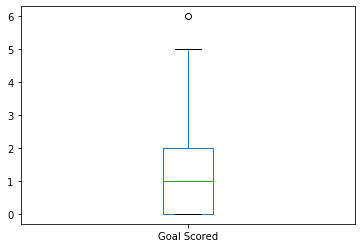

In [5]:
fifa_data.boxplot('Goal Scored', grid = False)

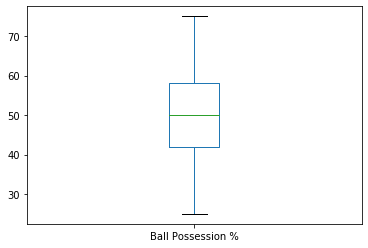

In [6]:
fifa_data.boxplot('Ball Possession %', grid = False)

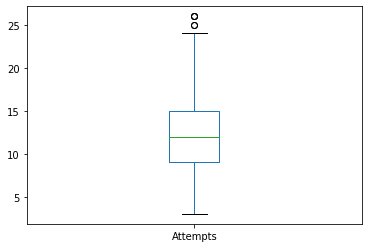

In [7]:
fifa_data.boxplot('Attempts', grid = False)

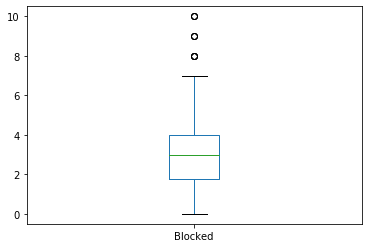

In [8]:
fifa_data.boxplot('Blocked', grid = False)

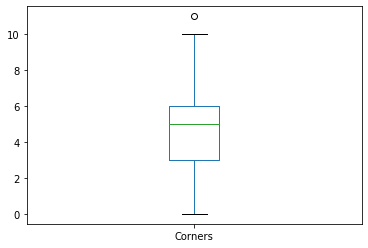

In [9]:
fifa_data.boxplot('Corners', grid = False)

In [10]:
fifa_data[['Goal Scored', 'Ball Possession %','Attempts', 'Blocked', 'Corners']].describe()

,Goal Scored,Ball Possession %,Attempts,Blocked,Corners
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.320312,49.992188,12.593750,3.359375,4.718750
std,1.156519,10.444074,5.245827,2.403195,2.446072
min,0.000000,25.000000,3.000000,0.000000,0.000000
25%,0.000000,42.000000,9.000000,1.750000,3.000000
50%,1.000000,50.000000,12.000000,3.000000,5.000000
75%,2.000000,58.000000,15.000000,4.000000,6.000000
max,6.000000,75.000000,26.000000,10.000000,11.000000


In [11]:
man_match_df = fifa_data[fifa_data['Man of the Match'] == 'Yes']
not_man_match_df = fifa_data[fifa_data['Man of the Match'] == 'No']
mm_pmf = thinkstats2.Pmf(list(man_match_df['Goal Scored']), label = "Man of Match")
nmm_pmf = thinkstats2.Pmf(list(not_man_match_df['Goal Scored']), label = "Not Man of Match")

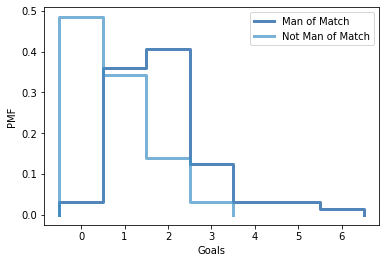

<Figure size 576x432 with 0 Axes>

In [12]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([mm_pmf,nmm_pmf])
thinkplot.Show(xlabel = 'Goals',ylabel='PMF')


In [13]:
mm_cdf = thinkstats2.Cdf(list(man_match_df['Goal Scored']), label = "Man of Match")

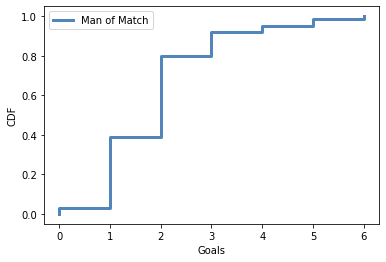

<Figure size 576x432 with 0 Axes>

In [14]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([mm_cdf])
thinkplot.Show(xlabel = 'Goals',ylabel='CDF')

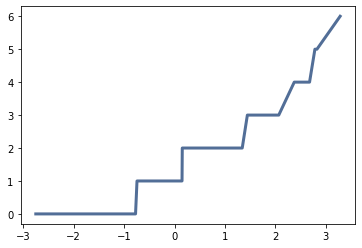

In [15]:
xs, ys = thinkstats2.NormalProbability(fifa_data['Goal Scored'])
thinkplot.Plot(xs, ys, label = 'Goals')

# I used a normal distribution do show the distribution of Goal Scored. The graph does not look smooth because
# the data is not continuous. The reason why this was selected was because looking at the historgram.
# The data appeared to be distributed in a normal distribution.

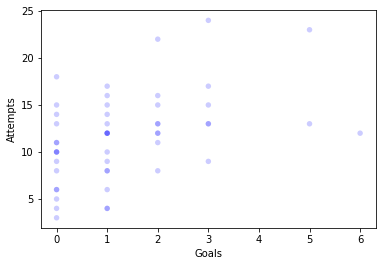

<Figure size 576x432 with 0 Axes>

In [16]:
sample = thinkstats2.SampleRows(fifa_data, 50)
goals , attempts = sample['Goal Scored'], sample['Attempts']
thinkplot.scatter(goals, attempts)
thinkplot.show(xlabel = 'Goals', ylabel = 'Attempts')

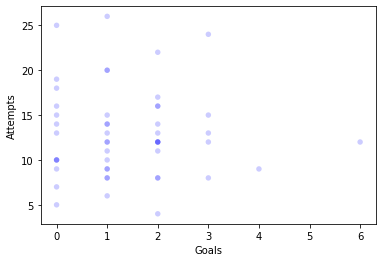

<Figure size 576x432 with 0 Axes>

In [17]:
sample2 = thinkstats2.SampleRows(fifa_data, 50)
goals , attempts = sample2['Goal Scored'], sample2['Attempts']
thinkplot.scatter(goals, attempts)
thinkplot.show(xlabel = 'Goals', ylabel = 'Attempts')

In [20]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

goals , attempts = fifa_data['Goal Scored'], fifa_data['Attempts']
print(f'Pearson Correlation: {Corr(goals, attempts)}')
print(f'Spearman Correlation: {SpearmanCorr(goals, attempts)}')

# Based on the Pearson and Spearman Correlation the amount goals and amount of attempts are weakly correlated.

Pearson Correlation: 0.14491470805249415
Spearman Correlation: 0.18861425902156578


In [21]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
data = fifa_data['Goal Scored'].values, fifa_data['Attempts'].values
ht = CorrelationPermute(data)
pvalue = ht.PValue()

# With a weak corrleation I wanted to test to see if there was no correlation between Goals Scored and Attempts.
# Since the p-value =0.103 we fail to reject the null hypothesis that there is no correlation between Goals Scored
# and Attempts

In [66]:
df = df.rename(columns = {'Goal Scored': 'Goal'})
formula = 'Goal ~ Attempts'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Goal   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.703
Date:                Sat, 08 Aug 2020   Prob (F-statistic):              0.103
Time:                        20:51:59   Log-Likelihood:                -198.38
No. Observations:                 128   AIC:                             400.8
Df Residuals:                     126   BIC:                             406.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9180      0.265      3.464      0.001       0.394       1.442
Attempts       0.0319      0.019      1.644      0.103      -0.007       0.070
==============================================================================
Omnibus:                       31.139   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.339
Skew:                           1.140   Prob(JB):                     7.11e-12
Kurtosis:                       5.103   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""